# Item based collaborative filtering python

In [1]:
#importing neccesary packages
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Step 1 - Data Preparation

In [24]:
#Reading movielens data from 
#https://grouplens.org/datasets/movielens/
my_df = pd.read_csv('C:\\Users\\User\\Downloads\\ml-100k\\u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])

In [25]:
#Checking Data
my_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [26]:
#Importing movie title and joining with main data
movie_titles = pd.read_csv('C:\\Users\\User\\Downloads\\Movie_Titles.csv',encoding= 'unicode_escape')
my_df = pd.merge(my_df, movie_titles, on='item_id')
my_df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# user_id - the ID of the user who rated the movie.
# item_id - the ID of the movie.
# rating - The rating the user gave the movie, between 1 and 5.
# timestamp - The time the movie was rated.
# title - The title of the movie.

# Step 2 - Data exploration

In [6]:
#Statitical features of the movie
my_df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [27]:
#creating mean ratings data
ratings = pd.DataFrame(my_df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
#creating number of ratings data
ratings['number_of_ratings'] = my_df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


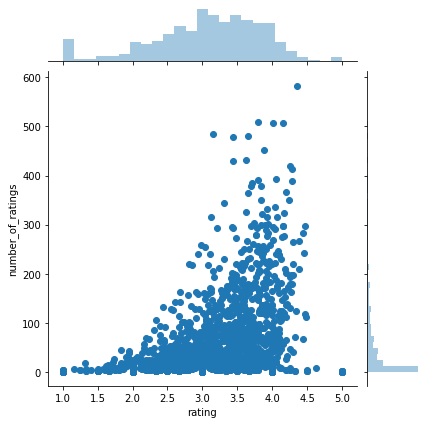

In [14]:
#Plotting the jointplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


# Creating User - Item interaction matrix

In [29]:
#creating the user-item interaction matrix
movie_matrix_UII = my_df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix_UII.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


In [30]:
#Most rated movies
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


# Making recommendation - Example movie- FARGO

In [31]:
#Fetching ratings for Fargo
Fargo_user_rating = movie_matrix_UII['Fargo (1996)']

In [33]:
#Finding the correlation with different movies
similar_to_fargo=movie_matrix_UII.corrwith(Fargo_user_rating)

In [34]:
#Observing the result
similar_to_fargo.head()

title
'Til There Was You (1997)    0.100000
1-900 (1994)                 0.866025
101 Dalmatians (1996)       -0.245368
12 Angry Men (1957)          0.098676
187 (1997)                   0.142509
dtype: float64

# creating a threshold for minimum number of ratings

In [35]:
#creating dataframe to bring in #of ratings
corr_fargo = pd.DataFrame(similar_to_fargo, columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [36]:
#Bringining in ratings
corr_fargo = corr_fargo.join(ratings['number_of_ratings'])

corr_fargo.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [38]:
corr_fargo[corr_fargo['number_of_ratings'] > 30].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Fargo (1996),1.000000,508
Eve's Bayou (1997),0.658512,64
Night Falls on Manhattan (1997),0.653412,32
M (1931),0.623271,44
"MatchMaker, The (1997)",0.605783,51
To Die For (1995),0.551740,87
Swimming with Sharks (1995),0.549680,47
Anna Karenina (1997),0.528691,33
Bullets Over Broadway (1994),0.491990,86


# Next - User based recommendation - On Demand